# Preprocesamiento del dataset
**Autor:** Natalia Castellano Ramos    &nbsp;&nbsp;&nbsp;

------------------------------------------------------
## Contenido

1. <a href="#imports"> Importación del dataset y de las librerías </a> <br>
2. <a href="#preprocesamiento"> Preprocesamiento del dataset </a> <br>
    2.1 <a href="#2.1"> Eliminación de filas y columnas </a> <br>
    2.2 <a href="#2.2"> Conversión del tipo de algunas variables </a> <br>
    2.3 <a href="#2.3"> Variables binarias </a> <br>
    2.4 <a href="#2.4"> Variable target: 'Vassopressors' (shock séptico)  </a> <br>
    2.5 <a href="#2.5"> Variable target: 'Outcome' (Supervivencia) </a> <br>
3. <a href="#export"> Exportación del dataset preprocesado </a> <br>
------------------------------------------------------

## 1. Importación del dataset y de las librerías<a name="imports"> </a>

In [4]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [5]:
# Lectura del archivo CSV con separador `;`
rawdf = pd.read_csv('./Data/rawdata.csv', delimiter=';')

rawdf

,ID,Age,Sex,Initial PCT value,DM,HTN,COPD,CAD,CHF,CKD w/o dialysis,...,Vasopressors,Creatinine,UOP,SOFA score,Outcome,LOS,Mechanical vent,Anatomical site of infection,Extent of infection,Microorganism
0,1,66.0,1.0,"1,36",2.0,1,2.0,2.0,2.0,2.0,...,2.0,"0,72",1.0,3.0,4.0,2.0,2.0,1,2,3
1,1,66.0,1.0,"30,53",2.0,1,2.0,2.0,2.0,2.0,...,1.0,"0,99",1.0,10.0,4.0,10.0,2.0,1,2,1
2,1,75.0,2.0,"3,81",1.0,2,2.0,2.0,1.0,1.0,...,2.0,"4,75",1.0,4.0,4.0,5.0,2.0,2,2,2
3,1,60.0,2.0,"5,81",2.0,2,2.0,2.0,2.0,2.0,...,2.0,"1,61",2.0,5.0,4.0,7.0,2.0,1,1,1
4,1,58.0,1.0,"0,22",2.0,1,2.0,1.0,2.0,2.0,...,2.0,"0,37",1.0,4.0,4.0,5.0,1.0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,364,52.0,2.0,"134,84",1.0,2,1.0,2.0,2.0,2.0,...,2.0,"2,64",1.0,5.0,4.0,9.0,1.0,"2,3",2,"1,2"
364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,Key,1.0,NaN,yes,NaN,male,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Preprocesamiento del dataset <a name="preprocesamiento"> </a>

### 2.1. Eliminación de filas y columnas <a name="2.1"> </a>

1. Elimino la primera columna (**id**) ya que no es relevante, también elimino la columna '**LOS**' o 'Lenght Of Stay' ya el modelo que voy a desarrollar no contempla los días que ha estado hospitalizado ya que los datos clínicos no varían y son del último día de hospitalización. 

2. Elimino las 4 últimas filas ya que no forman parte de los datos.

In [6]:
# Elimino la primera columna (id)
rawdf_sinId = rawdf.drop(rawdf.columns[0], axis=1)

# Eliminar la columna 'LOS' (Lenght Of Stay; duración estancia hospitalaria)
rawdf_sinLOS = rawdf_sinId.drop('LOS', axis=1)

# Elimino las últimas cuatro filas
df = rawdf_sinLOS.iloc[:-4]  # Selecciono todas las filas menos las 4 ultimas

df

,Age,Sex,Initial PCT value,DM,HTN,COPD,CAD,CHF,CKD w/o dialysis,CKD w dialysis,...,MAP,Vasopressors,Creatinine,UOP,SOFA score,Outcome,Mechanical vent,Anatomical site of infection,Extent of infection,Microorganism
0,66.0,1.0,"1,36",2.0,1,2.0,2.0,2.0,2.0,2.0,...,67.0,2.0,"0,72",1.0,3.0,4.0,2.0,1,2,3
1,66.0,1.0,"30,53",2.0,1,2.0,2.0,2.0,2.0,2.0,...,66.0,1.0,"0,99",1.0,10.0,4.0,2.0,1,2,1
2,75.0,2.0,"3,81",1.0,2,2.0,2.0,1.0,1.0,2.0,...,79.0,2.0,"4,75",1.0,4.0,4.0,2.0,2,2,2
3,60.0,2.0,"5,81",2.0,2,2.0,2.0,2.0,2.0,2.0,...,76.0,2.0,"1,61",2.0,5.0,4.0,2.0,1,1,1
4,58.0,1.0,"0,22",2.0,1,2.0,1.0,2.0,2.0,2.0,...,74.0,2.0,"0,37",1.0,4.0,4.0,1.0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,53.0,1.0,"28,19",1.0,1,1.0,2.0,2.0,2.0,1.0,...,89.0,2.0,"6,67",3.0,8.0,4.0,1.0,1,2,3
360,71.0,1.0,"0,05",2.0,2,2.0,2.0,2.0,2.0,2.0,...,52.0,1.0,"0,48",1.0,11.0,3.0,1.0,1,2,3
361,77.0,2.0,"0,1",2.0,1,2.0,2.0,2.0,2.0,2.0,...,113.0,2.0,"1,13",1.0,2.0,1.0,2.0,1,2,3
362,32.0,1.0,"0,25",2.0,2,2.0,2.0,2.0,2.0,2.0,...,76.0,2.0,"0,95",1.0,3.0,1.0,2.0,1,2,3


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            364 non-null    float64
 1   Sex                            364 non-null    float64
 2   Initial PCT value              364 non-null    object 
 3   DM                             364 non-null    float64
 4   HTN                            364 non-null    object 
 5   COPD                           364 non-null    float64
 6   CAD                            364 non-null    float64
 7   CHF                            364 non-null    float64
 8   CKD w/o dialysis               364 non-null    float64
 9   CKD w dialysis                 364 non-null    float64
 10  afib                           364 non-null    float64
 11  PE                             364 non-null    float64
 12  cancer                         364 non-null    flo

**Recuento de valores nulos**: no hay ningún valor nulo en todo el dataframe.

### 2.2. Variables numéricas <a name="2.2"> </a>

Hay **4 atributos 'object'** ('Initial PCT value', 'Bilirubin', 'Creatinine', 'HTN') , pero que en realidad **son tipo numérico**. Esto ocurre porque Pandas detecta como tipo 'object' los atributos que son decimales con coma, en lugar de con punto, que es el formato estándar de Python. Para solucionarlo,  voy a **convertir las comas en puntos** en esos atributos y posteriormente las voy a **convertir a tipo numérico** (float).

In [8]:
# Reemplazar comas por puntos y convertir a float
cols_to_convert_to_float = ['Initial PCT value', 'Bilirubin', 'Creatinine', 'HTN']

# Procesar cada columna
for col in cols_to_convert_to_float:
    df[col] = (
        df[col]
        .astype(str)  # Asegurarnos de que los datos sean cadenas
        .str.replace(',', '.', regex=False)  # Reemplazar comas por puntos
        .str.strip()  # Eliminar espacios en blanco
        .astype(float)  # Convertir todo a float
    )

# Verificar el resultado
print(df[cols_to_convert_to_float].info())

# Mostrar las primeras filas para comprobar el resultado
print(df[cols_to_convert_to_float].head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Initial PCT value  364 non-null    float64
 1   Bilirubin          364 non-null    float64
 2   Creatinine         364 non-null    float64
 3   HTN                364 non-null    float64
dtypes: float64(4)
memory usage: 11.5 KB
None
   Initial PCT value  Bilirubin  Creatinine  HTN
0               1.36       1.10        0.72  1.0
1              30.53       0.40        0.99  1.0
2               3.81       0.80        4.75  2.0
3               5.81       0.81        1.61  2.0
4               0.22       0.60        0.37  1.0


C:\Users\natal\AppData\Local\Temp\ipykernel_31748\1372779162.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = (
C:\Users\natal\AppData\Local\Temp\ipykernel_31748\1372779162.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = (
C:\Users\natal\AppData\Local\Temp\ipykernel_31748\1372779162.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

Voy a convertir el tipo de la variable 'Age', ya que aparece como tipo float pero es un int.

In [9]:
df["Age"] = df["Age"].astype(int)

C:\Users\natal\AppData\Local\Temp\ipykernel_31748\3729672396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"] = df["Age"].astype(int)


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            364 non-null    int64  
 1   Sex                            364 non-null    float64
 2   Initial PCT value              364 non-null    float64
 3   DM                             364 non-null    float64
 4   HTN                            364 non-null    float64
 5   COPD                           364 non-null    float64
 6   CAD                            364 non-null    float64
 7   CHF                            364 non-null    float64
 8   CKD w/o dialysis               364 non-null    float64
 9   CKD w dialysis                 364 non-null    float64
 10  afib                           364 non-null    float64
 11  PE                             364 non-null    float64
 12  cancer                         364 non-null    flo

In [11]:
# Contar los valores NaN en cada columna
nan_counts = df.isna().sum()

# Mostrar los resultados
print(nan_counts)

Age                              0
Sex                              0
Initial PCT value                0
DM                               0
HTN                              0
COPD                             0
CAD                              0
CHF                              0
CKD w/o dialysis                 0
CKD w dialysis                   0
afib                             0
PE                               0
cancer                           0
PaO2                             0
FiO2                             0
Platelets                        0
Bilirubin                        0
GCS                              0
MAP                              0
Vasopressors                     0
Creatinine                       0
UOP                              0
SOFA score                       0
Outcome                          0
Mechanical vent                  0
Anatomical site of infection     0
Extent of infection              0
Microorganism                    0
dtype: int64


In [12]:
# Guardar las columnas del DataFrame en una lista
columnas = df.columns.tolist()

# Imprimir la lista de columnas
print(columnas)


['Age', 'Sex', 'Initial PCT value', 'DM', 'HTN', 'COPD', 'CAD', 'CHF', 'CKD w/o dialysis ', 'CKD w dialysis', 'afib ', 'PE', 'cancer ', 'PaO2', 'FiO2', 'Platelets', 'Bilirubin', 'GCS', 'MAP', 'Vasopressors', 'Creatinine', 'UOP', 'SOFA score', 'Outcome', 'Mechanical vent', 'Anatomical site of infection ', 'Extent of infection', 'Microorganism ']


### 2.3. Variables binarias <a name="2.3"> </a>

In [13]:
# Verificar valores únicos en cada columna
print(df['cancer '].unique())
print(df['PE'].unique())
print(df['afib '].unique())
print(df['CKD w dialysis'].unique())
print(df['CKD w/o dialysis '].unique())
print(df['CHF'].unique())
print(df['CAD'].unique())
print(df['COPD'].unique())
print(df['DM'].unique())
print(df['HTN'].unique())
print(df['Mechanical vent'].unique())
print(df['Sex'].unique())

[2. 1.]
[2. 1.]
[2. 1.]
[2. 1.]
[2. 1.]
[2. 1.]
[2. 1.]
[2. 1.]
[2. 1.]
[1. 2.]
[2. 1.]
[1. 2.]


In [14]:
# Lista de columnas binarias
binary_cols = [
    'cancer ', 'PE', 'afib ', 'CKD w dialysis', 'CKD w/o dialysis ',
    'CHF', 'CAD', 'COPD', 'DM', 'HTN', 'Mechanical vent', 'Sex'
]

# Aplicar mapeo a cada columna y convertir a entero
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({2.0: 0, 1.0: 1}).astype(int))




C:\Users\natal\AppData\Local\Temp\ipykernel_31748\271124767.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[binary_cols] = df[binary_cols].apply(lambda x: x.map({2.0: 0, 1.0: 1}).astype(int))


In [15]:
# Verificar valores únicos en cada columna
print(df['cancer '].unique())
print(df['PE'].unique())
print(df['afib '].unique())
print(df['CKD w dialysis'].unique())
print(df['CKD w/o dialysis '].unique())
print(df['CHF'].unique())
print(df['CAD'].unique())
print(df['COPD'].unique())
print(df['DM'].unique())
print(df['HTN'].unique())
print(df['Mechanical vent'].unique())
print(df['Sex'].unique())

print(df.info())    

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[1 0]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            364 non-null    int64  
 1   Sex                            364 non-null    int64  
 2   Initial PCT value              364 non-null    float64
 3   DM                             364 non-null    int64  
 4   HTN                            364 non-null    int64  
 5   COPD                           364 non-null    int64  
 6   CAD                            364 non-null    int64  
 7   CHF                            364 non-null    int64  
 8   CKD w/o dialysis               364 non-null    int64  
 9   CKD w dialysis                 364 non-null    int64  
 10  afib                           364 non-null    int64  
 11  PE                             364 non

### 2.4. Variables categóricas <a name="2.4"> </a>

Hay 4 atributos de tipo numérico que realmente son de tipo categórico: Microorganism, Anatomical site of infection, Exent of infection, UOP (Urine Output ml/24 h).

A estas cuatro variables categóricas les voy a aplicar codificación one-hot para transformar estos datos categóricos en un formato numérico comprensible para los algoritmos de machine learning que posteriormente aplicaré. Esto evitará que los modelos utilicen de forma errónea el orden o la relación entre las categorías y mejorará la precisión y eficiencia del modelo al tratar cada categoría de manera independiente.
Como resultado, cada valor categórico se convertirá en una nueva columna binaria en el dataframe, y las tres columnas originales serán eliminadas.


**Microorganism**

In [16]:
print(df["Microorganism "].value_counts())

Microorganism 
3       157
1        98
2        90
1,2       5
4         4
1, 2      4
2, 3      3
3, 2      1
3,2       1
2,3       1
Name: count, dtype: int64


In [17]:

print("Valores únicos en Microorganism:", df["Microorganism "].unique())

# Mapeo de combinaciones a valores únicos
microorganism_mapping = {
    '1,2': 5, '1, 2': 5, '2,1': 5, '2, 1': 5,
    '2,3': 6, '3,2': 6, '3, 2': 6, '2, 3': 6
}

# Reemplazar los valores combinados por sus nuevas categorías
df['Microorganism '] = df['Microorganism '].replace(microorganism_mapping)

# Convertir los valores a enteros
df['Microorganism '] = df['Microorganism '].astype(int)

# Aplicar One-Hot Encoding
df = pd.get_dummies(df, columns=['Microorganism '], prefix="Microorganism")

# Verificar resultado
print(df.head())


Valores únicos en Microorganism: ['3' '1' '2' '1, 2' '3, 2' '4' '2, 3' '3,2' '1,2' '2,3']
   Age  Sex  Initial PCT value  DM  HTN  COPD  CAD  CHF  CKD w/o dialysis   \
0   66    1               1.36   0    1     0    0    0                  0   
1   66    1              30.53   0    1     0    0    0                  0   
2   75    0               3.81   1    0     0    0    1                  1   
3   60    0               5.81   0    0     0    0    0                  0   
4   58    1               0.22   0    1     0    1    0                  0   

   CKD w dialysis  ...  Outcome  Mechanical vent  \
0               0  ...      4.0                0   
1               0  ...      4.0                0   
2               0  ...      4.0                0   
3               0  ...      4.0                0   
4               0  ...      4.0                1   

   Anatomical site of infection   Extent of infection  Microorganism_1  \
0                              1                    2 

C:\Users\natal\AppData\Local\Temp\ipykernel_31748\2061882362.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Microorganism '] = df['Microorganism '].replace(microorganism_mapping)
C:\Users\natal\AppData\Local\Temp\ipykernel_31748\2061882362.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Microorganism '] = df['Microorganism '].astype(int)


**Exent of infection**

In [18]:
print("Valores únicos en Extent of infection:", df["Extent of infection"].unique())

df["Extent of infection"] = df["Extent of infection"].astype(str).str.strip()

# Reemplazar combinaciones por el valor 3
df["Extent of infection"] = df["Extent of infection"].replace({'1,2': 3, '2,1': 3, '1, 2': 3, '2, 3': 3, '3, 2': 3})
print("Valores únicos después de limpiar:", df["Extent of infection"].unique())

# Convertir a entero
df["Extent of infection"] = df["Extent of infection"].astype(int)

# One-Hot Encoding
df = pd.get_dummies(df, columns=["Extent of infection"], prefix="Extent")
print(df.head())



Valores únicos en Extent of infection: ['2' '1' '1, 2']
Valores únicos después de limpiar: ['2' '1' 3]
   Age  Sex  Initial PCT value  DM  HTN  COPD  CAD  CHF  CKD w/o dialysis   \
0   66    1               1.36   0    1     0    0    0                  0   
1   66    1              30.53   0    1     0    0    0                  0   
2   75    0               3.81   1    0     0    0    1                  1   
3   60    0               5.81   0    0     0    0    0                  0   
4   58    1               0.22   0    1     0    1    0                  0   

   CKD w dialysis  ...  Anatomical site of infection   Microorganism_1  \
0               0  ...                              1            False   
1               0  ...                              1             True   
2               0  ...                              2            False   
3               0  ...                              1             True   
4               0  ...                              2     

**Anatomical site of infection**

In [19]:
print("Valores únicos en Anatomical site of infection:", df["Anatomical site of infection "].unique())

Valores únicos en Anatomical site of infection: ['1' '2' '7' '3' '1, 2' '6' '4' '6, 1' '3, 6' '5' '1,2' '1,2,3' '1,4'
 '1,3' '2,3' '7, 2' '1, 6']


In [20]:
print("Recuento de valores únicos en Anatomical site of infection:")
print(df["Anatomical site of infection "].value_counts())


Recuento de valores únicos en Anatomical site of infection:
Anatomical site of infection 
1        166
2         71
3         44
7         32
6         27
1, 2       4
4          4
1,2        4
5          3
2,3        2
6, 1       1
3, 6       1
1,2,3      1
1,4        1
1,3        1
7, 2       1
1, 6       1
Name: count, dtype: int64


In [21]:
# Limpiar la columna: eliminamos espacios y caracteres extra
df["Anatomical site of infection "] = df["Anatomical site of infection "].astype(str).str.replace(" ", "").str.strip()

# Verificar qué valores únicos hay antes de reemplazar
print("Valores únicos antes de limpiar:", df["Anatomical site of infection "].unique())

# Reemplazar las combinaciones por la categoría 8 y las categorías individuales permanecen igual
df["Anatomical site of infection "] = df["Anatomical site of infection "].replace({
    '1,2': 8, '2,1': 8, 
    '1,3': 8, '3,1': 8, 
    '1,4': 8, '4,1': 8, 
    '1,6': 8, '6,1': 8, 
    '2,3': 8, '3,2': 8, 
    '2,7': 8, '7,2': 8, 
    '3,6': 8, '6,3': 8, 
    '1,2,3': 8  # Aseguramos que todas las combinaciones posibles estén cubiertas
})

# Convertir a tipo entero
df["Anatomical site of infection "] = df["Anatomical site of infection "].astype(int)

# Aplicar One-Hot Encoding
df = pd.get_dummies(df, columns=["Anatomical site of infection "], prefix="Anatomical")

# Ver las primeras filas del dataframe para verificar
print(df.head())



Valores únicos antes de limpiar: ['1' '2' '7' '3' '1,2' '6' '4' '6,1' '3,6' '5' '1,2,3' '1,4' '1,3' '2,3'
 '7,2' '1,6']
   Age  Sex  Initial PCT value  DM  HTN  COPD  CAD  CHF  CKD w/o dialysis   \
0   66    1               1.36   0    1     0    0    0                  0   
1   66    1              30.53   0    1     0    0    0                  0   
2   75    0               3.81   1    0     0    0    1                  1   
3   60    0               5.81   0    0     0    0    0                  0   
4   58    1               0.22   0    1     0    1    0                  0   

   CKD w dialysis  ...  Extent_2  Extent_3  Anatomical_1  Anatomical_2  \
0               0  ...      True     False          True         False   
1               0  ...      True     False          True         False   
2               0  ...      True     False         False          True   
3               0  ...     False     False          True         False   
4               0  ...      True     Fals

**UOP (Urine Output ml/24 h)**

In [22]:
print("Valores únicos en UOP:", df["UOP"].unique())

# One-Hot Encoding
df = pd.get_dummies(df, columns=["UOP"], prefix="UOP")
print(df.head())


Valores únicos en UOP: [1. 2. 3.]
   Age  Sex  Initial PCT value  DM  HTN  COPD  CAD  CHF  CKD w/o dialysis   \
0   66    1               1.36   0    1     0    0    0                  0   
1   66    1              30.53   0    1     0    0    0                  0   
2   75    0               3.81   1    0     0    0    1                  1   
3   60    0               5.81   0    0     0    0    0                  0   
4   58    1               0.22   0    1     0    1    0                  0   

   CKD w dialysis  ...  Anatomical_2  Anatomical_3  Anatomical_4  \
0               0  ...         False         False         False   
1               0  ...         False         False         False   
2               0  ...          True         False         False   
3               0  ...         False         False         False   
4               0  ...          True         False         False   

   Anatomical_5  Anatomical_6  Anatomical_7  Anatomical_8  UOP_1.0  UOP_2.0  \
0        

In [23]:
# Guardar las columnas del DataFrame en una lista
columnas = df.columns.tolist()
# Imprimir la lista de columnas
print(columnas)

['Age', 'Sex', 'Initial PCT value', 'DM', 'HTN', 'COPD', 'CAD', 'CHF', 'CKD w/o dialysis ', 'CKD w dialysis', 'afib ', 'PE', 'cancer ', 'PaO2', 'FiO2', 'Platelets', 'Bilirubin', 'GCS', 'MAP', 'Vasopressors', 'Creatinine', 'SOFA score', 'Outcome', 'Mechanical vent', 'Microorganism_1', 'Microorganism_2', 'Microorganism_3', 'Microorganism_4', 'Microorganism_5', 'Microorganism_6', 'Extent_1', 'Extent_2', 'Extent_3', 'Anatomical_1', 'Anatomical_2', 'Anatomical_3', 'Anatomical_4', 'Anatomical_5', 'Anatomical_6', 'Anatomical_7', 'Anatomical_8', 'UOP_1.0', 'UOP_2.0', 'UOP_3.0']


Ahora que ya está aplicada la codificación one-hot en esas tres variables categóricas, las columnas que se han generado son de tipo bool, las voy a convertir a tipo int (0 y 1), para garantizar la compatibilidad con algunos modelos de machine learning.

In [24]:
# Seleccionar solo las columnas booleanas
bool_cols = df.select_dtypes(include=['bool']).columns  
df[bool_cols] = df[bool_cols].astype(int)


### 2.5. Variable target: 'Vasopressors' (shock séptico) <a name="2.5"> </a>

La variable '**Vasopressors**' categórica que indica que el paciente ha sufrido un shock séptico o no. En el dataset original adopta dos posibles valores:
- 1.0 = yes 
- 2.0 = no

Lo que voy a hacer es mapear los valores para que sea un formato binario de 0 y 1:
- 1 = yes
- 0 = no

In [25]:
print("Valores únicos en Vasopressors antes de la transformación:", df["Vasopressors"].unique())

Valores únicos en Vasopressors antes de la transformación: [2. 1.]


In [26]:
df["Vasopressors"] = df["Vasopressors"].map({1.0: 1, 2.0: 0}).astype(int)

print("Valores únicos en Vasopressors después de la transformación:", df["Vasopressors"].unique())

# 0 = yes -> hay 297 con shock septico
# 1 = no -> hay 67 sin shock septico

Valores únicos en Vasopressors después de la transformación: [0 1]


### 2.5. Variable target: 'Outcome' (Supervivencia) <a name="2.5"> </a>

**Outcome**: es la variable categórica que indica si un paciente sobrevivió o no. Sus posibles valores son:
- 1.0: SÍ sobrevivió
- 2.0: NO sobrevivió
- 3.0: se trasladó a UCI pero NO sobrevivió
- 4.0: se trasladó a la UCI y SÍ sobrevivió

In [27]:
# target 2: survival (outcome)
df['Outcome'].value_counts()

# 1.0: yes -> 133
# 2.0: no -> 3
# 3.0: no (uci) -> 45
# 4.0: yes (uci) -> 183

# total yes: 133+183 = 316
# total no: 48


Outcome
4.0    183
1.0    133
3.0     45
2.0      3
Name: count, dtype: int64

In [28]:
# Mapear Outcome a binario (1 = sobrevivió, 0 = no sobrevivió)
df["Outcome"] = df["Outcome"].map({1.0: 1, 4.0: 1, 2.0: 0, 3.0: 0}).astype(int)

print("Valores únicos en Outcome después de la transformación:", df["Outcome"].unique())

df['Outcome'].value_counts()

Valores únicos en Outcome después de la transformación: [1 0]


Outcome
1    316
0     48
Name: count, dtype: int64

In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                364 non-null    int64  
 1   Sex                364 non-null    int64  
 2   Initial PCT value  364 non-null    float64
 3   DM                 364 non-null    int64  
 4   HTN                364 non-null    int64  
 5   COPD               364 non-null    int64  
 6   CAD                364 non-null    int64  
 7   CHF                364 non-null    int64  
 8   CKD w/o dialysis   364 non-null    int64  
 9   CKD w dialysis     364 non-null    int64  
 10  afib               364 non-null    int64  
 11  PE                 364 non-null    int64  
 12  cancer             364 non-null    int64  
 13  PaO2               364 non-null    float64
 14  FiO2               364 non-null    float64
 15  Platelets          364 non-null    float64
 16  Bilirubin          364 non

In [30]:
df.isnull().sum()


Age                  0
Sex                  0
Initial PCT value    0
DM                   0
HTN                  0
COPD                 0
CAD                  0
CHF                  0
CKD w/o dialysis     0
CKD w dialysis       0
afib                 0
PE                   0
cancer               0
PaO2                 0
FiO2                 0
Platelets            0
Bilirubin            0
GCS                  0
MAP                  0
Vasopressors         0
Creatinine           0
SOFA score           0
Outcome              0
Mechanical vent      0
Microorganism_1      0
Microorganism_2      0
Microorganism_3      0
Microorganism_4      0
Microorganism_5      0
Microorganism_6      0
Extent_1             0
Extent_2             0
Extent_3             0
Anatomical_1         0
Anatomical_2         0
Anatomical_3         0
Anatomical_4         0
Anatomical_5         0
Anatomical_6         0
Anatomical_7         0
Anatomical_8         0
UOP_1.0              0
UOP_2.0              0
UOP_3.0    

In [31]:
print(df.describe())

              Age         Sex  Initial PCT value          DM         HTN  \
count  364.000000  364.000000         364.000000  364.000000  364.000000   
mean    61.315934    0.519231          13.879093    0.370879    0.582418   
std     12.633493    0.500318          31.574289    0.483705    0.493839   
min     20.000000    0.000000           0.050000    0.000000    0.000000   
25%     55.000000    0.000000           0.297500    0.000000    0.000000   
50%     63.000000    1.000000           1.645000    0.000000    1.000000   
75%     71.000000    1.000000          11.030000    1.000000    1.000000   
max     86.000000    1.000000         252.500000    1.000000    1.000000   

             COPD         CAD         CHF  CKD w/o dialysis   CKD w dialysis  \
count  364.000000  364.000000  364.000000         364.000000      364.000000   
mean     0.299451    0.222527    0.197802           0.140110        0.043956   
std      0.458648    0.416516    0.398890           0.347579        0.20528

### 2.6. Variable target: 'SOFA score' <a name="2.6"> </a>

La variable SOFA score es categórica, con un rango de valores desde 0 hasta 23. Voy a transformarla a variable int ya que aparece como tipo float.

In [32]:
df['SOFA score'].describe()

count    364.000000
mean       5.060440
std        3.495243
min        0.000000
25%        3.000000
50%        4.000000
75%        7.000000
max       23.000000
Name: SOFA score, dtype: float64

In [33]:
print("Valores únicos en Outcome después de la transformación:", df["SOFA score"].unique())

Valores únicos en Outcome después de la transformación: [ 3. 10.  4.  5.  2.  1.  6. 15.  8.  9.  0.  7. 13. 12. 14. 23. 17. 11.
 16.]


<Axes: >

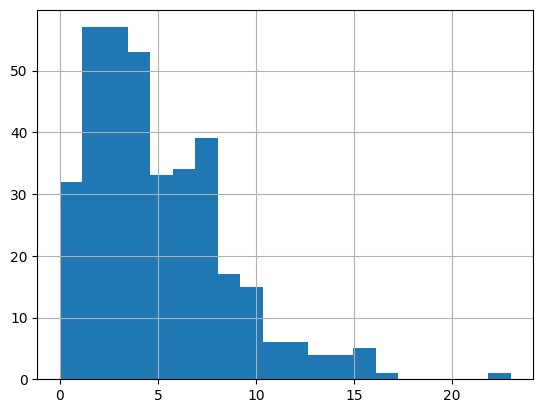

In [34]:
df['SOFA score'].hist(bins=20)

In [36]:
df['SOFA score'] = df['SOFA score'].astype(int)


## 3. Exportación del dataset preprocesado <a name="export"> </a>

In [37]:
df.to_csv('df_preprocesado.csv', index=False)

In [38]:
df_preprocesado = pd.read_csv('df_preprocesado.csv')
df_preprocesado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                364 non-null    int64  
 1   Sex                364 non-null    int64  
 2   Initial PCT value  364 non-null    float64
 3   DM                 364 non-null    int64  
 4   HTN                364 non-null    int64  
 5   COPD               364 non-null    int64  
 6   CAD                364 non-null    int64  
 7   CHF                364 non-null    int64  
 8   CKD w/o dialysis   364 non-null    int64  
 9   CKD w dialysis     364 non-null    int64  
 10  afib               364 non-null    int64  
 11  PE                 364 non-null    int64  
 12  cancer             364 non-null    int64  
 13  PaO2               364 non-null    float64
 14  FiO2               364 non-null    float64
 15  Platelets          364 non-null    float64
 16  Bilirubin          364 non